In [1]:
import pandas as pd
df = pd.read_csv('c:/Users/tjoeun/Desktop/AD/advertising_ef.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,27-03-2016 00:53,0
1,NaN,31.0,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,04-04-2016 01:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,13-03-2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,10-01-2016 02:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,03-06-2016 03:36,0


In [2]:
df.shape

(1009, 10)

In [3]:
#원핫인코딩
df = pd.get_dummies(data=df, columns=['Gender'], prefix='sex')

In [4]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Country,Timestamp,Clicked on Ad,sex_Female,sex_Male
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Tunisia,27-03-2016 00:53,0,1,0
1,NaN,31.0,68441.85,193.77,Monitored national standardization,West Jodi,Nauru,04-04-2016 01:39,0,0,1
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,San Marino,13-03-2016 20:35,0,1,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Italy,10-01-2016 02:31,0,0,1
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Iceland,03-06-2016 03:36,0,1,0


In [5]:
#필요한 컬럼만 추출
cols = df.columns[[0, 1, 2, 3, 9, 10, 8]]
df1 = df[cols]

In [6]:
df1.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,sex_Female,sex_Male,Clicked on Ad
0,68.95,35.0,61833.90,256.09,1,0,0
1,NaN,31.0,68441.85,193.77,0,1,0
2,69.47,26.0,59785.94,236.50,1,0,0
3,74.15,29.0,54806.18,245.89,0,1,0
4,68.37,35.0,73889.99,225.58,1,0,0


In [7]:
#결측값 확인
df1.isna().sum()

Daily Time Spent on Site     4
Age                         11
Area Income                 11
Daily Internet Usage         4
sex_Female                   0
sex_Male                     0
Clicked on Ad                0
dtype: int64

In [8]:
#결측값 제거
df1.dropna(inplace=True)
df1 = df1.set_index(cols[0]).reset_index()

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_9728\1467821811.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


In [9]:
df1.shape

(980, 7)

In [10]:
#균형 데이터 확인
df1['Clicked on Ad'].value_counts()

0    490
1    490
Name: Clicked on Ad, dtype: int64

c:\anaconda\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
c:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


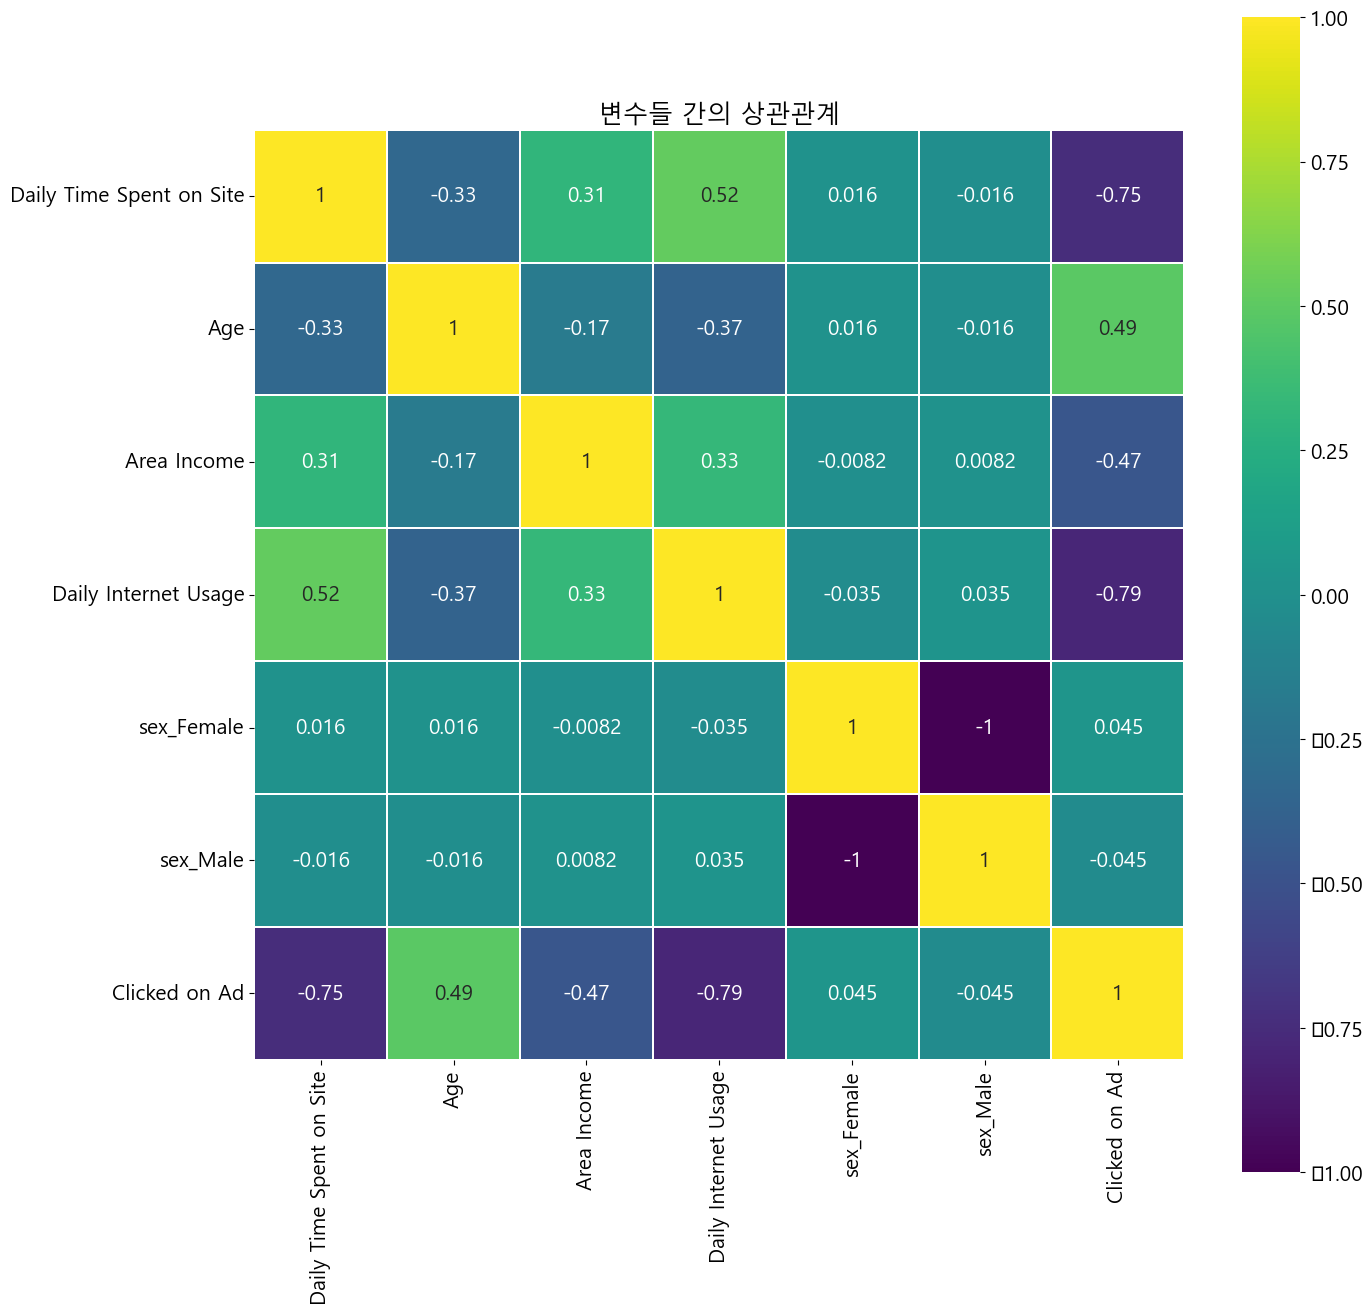

In [11]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import seaborn as sns

#상관계수 행렬 그래프
plt.figure(figsize=(15,15))
plt.rc('font', size=15)
sns.heatmap(df1.corr(), linewidths=0.01, square=True, annot=True,
            cmap=plt.cm.viridis, linecolor='white')
plt.title('변수들 간의 상관관계')
plt.show()

In [12]:
X = df1[cols[0:-1]]
y = df1[cols[-1]]

In [13]:
import statsmodels.api as sm
model = sm.Logit(y, X)
result = model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.093281
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                Logit              Pseudo R-squared:   0.865      
Dependent Variable:   Clicked on Ad      AIC:                194.8312   
Date:                 2023-04-18 18:10   BIC:                224.1566   
No. Observations:     980                Log-Likelihood:     -91.416    
Df Model:             5                  LL-Null:            -679.28    
Df Residuals:         974                LLR p-value:        5.2881e-252
Converged:            1.0000             Scale:              1.0000     
No. Iterations:       10.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Daily Time Spent on Site -0.1905   0.0206 -9.2673 0.0000 -0.2308 -0.1502
Age                       0.1689   0.0259  6.5266 0.0000  0.1182  0.2196
Area Income              -0.0001   0.0000 -7.2600 0.0000 -0.0002 -0.0001
Daily Internet Usage     -0.0636   0.0068 -9.3762 0.0000 -0.0769 -0.0503
sex_Female               27.3992   2.7428  9.9895 0.0000 22.0234 32.7750
sex_Male                 26.9194   2.7142  9.9180 0.0000 21.5996 32.2391
========================================================================

"""

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,1.454752,Daily Time Spent on Site
1,1.194809,Age
2,1.156368,Area Income
3,1.516927,Daily Internet Usage
4,39.007325,sex_Female
5,35.712932,sex_Male
